EDA

In [1]:
# Import Libraries
import configparser
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [5]:
# Connect to the MySQL database

config = configparser.ConfigParser()
config.read('../DB_Scripts/db_config.ini')

host = config['mysql']['host']
user = config['mysql']['user']
password = config['mysql']['password']

connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password
)

print("¡Connected to the database!")
cursor = connection.cursor()

¡Connected to the database!


In [6]:
# Select the "music_db" database and do the SQL query to bring the data from the "grammys" table. Read the data in a dataframe

cursor.execute("USE music_db")
query_table = "SELECT * FROM grammys"

df_grammys = pd.read_sql(query_table, connection)

connection.commit()
cursor.close()
connection.close()


C:\Users\Maria Jose\AppData\Local\Temp\ipykernel_19144\1750671807.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_grammys = pd.read_sql(query_table, connection)


In [7]:
df_grammys.head()

,grammy_id,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [8]:
df_grammys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   grammy_id     4810 non-null   int64 
 1   year          4810 non-null   int64 
 2   title         4810 non-null   object
 3   published_at  4810 non-null   object
 4   updated_at    4810 non-null   object
 5   category      4810 non-null   object
 6   nominee       4804 non-null   object
 7   artist        2970 non-null   object
 8   workers       2620 non-null   object
 9   img           3443 non-null   object
 10  winner        4810 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.5+ KB


In [9]:
# Nulls values per column

df_grammys.isnull().sum()

grammy_id          0
year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

In [10]:
unique_values = df_grammys.nunique()
print("Unique values per column:")
print(unique_values)


Unique values per column:
grammy_id       4810
year              62
title             62
published_at       4
updated_at         4
category         638
nominee         4131
artist          1658
workers         2366
img             1463
winner             1
dtype: int64


In [11]:
# Count duplicate records in all columns
duplicates = df_grammys.duplicated().sum()

print("Number of duplicate records in all columns:", duplicates)


Cantidad de registros duplicados en todas las columnas: 0


In [12]:
# Descriptive statistics

columns_statistics = ["year"]

description = df_grammys[columns_statistics].describe()
print(description)

              year
count  4810.000000
mean   1995.566944
std      17.149720
min    1958.000000
25%    1983.000000
50%    1998.000000
75%    2010.000000
max    2019.000000


In [13]:
# Convert columns 'published_at' y 'updated_at' to datetime type
df_grammys['published_at'] = pd.to_datetime(df_grammys['published_at'])
df_grammys['updated_at'] = pd.to_datetime(df_grammys['updated_at'])


### Analysis of categorical variables

In [15]:
# Unique values by title

title_sample = df_grammys["title"].unique()
print("Random sample of title:")
print(title_sample[:25]) 

Random sample of title:
['62nd Annual GRAMMY Awards  (2019)' '61st Annual GRAMMY Awards  (2018)'
 '60th Annual GRAMMY Awards  (2017)' '59th Annual GRAMMY Awards  (2016)'
 '58th Annual GRAMMY Awards  (2015)' '57th Annual GRAMMY Awards  (2014)'
 '56th Annual GRAMMY Awards  (2013)' '55th Annual GRAMMY Awards  (2012)'
 '54th Annual GRAMMY Awards  (2011)' '53rd Annual GRAMMY Awards  (2010)'
 '52nd Annual GRAMMY Awards  (2009)' '51st Annual GRAMMY Awards  (2008)'
 '50th Annual GRAMMY Awards  (2007)' '49th Annual GRAMMY Awards  (2006)'
 '48th Annual GRAMMY Awards  (2005)' '47th Annual GRAMMY Awards  (2004)'
 '46th Annual GRAMMY Awards  (2003)' '45th Annual GRAMMY Awards  (2002)'
 '44th Annual GRAMMY Awards  (2001)' '43rd Annual GRAMMY Awards  (2000)'
 '42nd Annual GRAMMY Awards  (1999)' '41st Annual GRAMMY Awards  (1998)'
 '40th Annual GRAMMY Awards  (1997)' '39th Annual GRAMMY Awards  (1996)'
 '38th Annual GRAMMY Awards  (1995)']


In [17]:
# Unique values by category

category_sample = df_grammys["category"].unique()
print("Random sample of category:")
print(category_sample[:25])

Random sample of category:
['Record Of The Year' 'Album Of The Year' 'Song Of The Year'
 'Best New Artist' 'Best Pop Solo Performance'
 'Best Pop Duo/Group Performance' 'Best Traditional Pop Vocal Album'
 'Best Pop Vocal Album' 'Best Dance Recording'
 'Best Dance/Electronic Album' 'Best Contemporary Instrumental Album'
 'Best Rock Performance' 'Best Metal Performance' 'Best Rock Song'
 'Best Rock Album' 'Best Alternative Music Album' 'Best R&B Performance'
 'Best Traditional R&B Performance' 'Best R&B Song'
 'Best Urban Contemporary Album' 'Best R&B Album' 'Best Rap Performance'
 'Best Rap/Sung Performance' 'Best Rap Song' 'Best Rap Album']


In [18]:
# Unique values by nominee

nominee_sample = df_grammys["nominee"].unique()
print("Random sample of nominee:")
print(nominee_sample[:25]) 

Random sample of nominee:
['Bad Guy' 'Hey, Ma' '7 rings' 'Hard Place' 'Talk' 'Old Town Road'
 'Truth Hurts' 'Sunflower' 'When We All Fall Asleep, Where Do We Go?'
 'I,I' 'Norman F***ing Rockwell!' 'thank u, next' 'I Used To Know Her' '7'
 'Cuz I Love You (Deluxe)' 'Father Of The Bride'
 'Always Remember Us This Way' 'Bring My Flowers Now' 'Lover'
 'Norman F***ing Rockwell' 'Someone You Loved' 'Billie Eilish'
 'Black Pumas' 'Lil Nas X' 'Lizzo']


In [19]:
# Unique values by artist

artist_sample = df_grammys["artist"].unique()
print("Random sample of artist:")
print(artist_sample[:25]) 

Random sample of artist:
['Billie Eilish' 'Bon Iver' 'Ariana Grande' 'H.E.R.' 'Khalid'
 'Lil Nas X Featuring Billy Ray Cyrus' 'Lizzo' 'Post Malone & Swae Lee'
 'Lana Del Rey' 'Lil Nas X' 'Vampire Weekend' None 'Beyoncé'
 'Taylor Swift' 'Ariana Grande & Social House' 'Jonas Brothers'
 'Shawn Mendes & Camila Cabello' 'Elvis Costello & The Imposters'
 'Andrea Bocelli' 'Michael Bublé' 'John Legend' 'Barbra Streisand'
 'Ed Sheeran' 'The Chemical Brothers' 'Bonobo']


In [21]:
# Unique values by workers

workers_sample = df_grammys["workers"].unique()
print("Random sample of workers:")
print(workers_sample[:20]) 

Random sample of workers:
["Finneas O'Connell, producer; Rob Kinelski & Finneas O'Connell, engineers/mixers; John Greenham, mastering engineer"
 'BJ Burton, Brad Cook, Chris Messina & Justin Vernon, producers; BJ Burton, Zach Hanson & Chris Messina, engineers/mixers; Greg Calbi, mastering engineer'
 'Charles Anderson, Tommy Brown, Michael Foster & Victoria Monet, producers; Serban Ghenea, John Hanes, Billy Hickey & Brendan Morawski, engineers/mixers; Randy Merrill, mastering engineer'
 'Rodney “Darkchild” Jerkins, producer; Joseph Hurtado, Jaycen Joshua, Derek Keota & Miki Tsutsumi, engineers/mixers; Colin Leonard, mastering engineer'
 'Disclosure & Denis Kosiak, producers; Ingmar Carlson, Jon Castelli, Josh Deguzman, John Kercy, Denis Kosiak, Guy Lawrence & Michael Romero, engineers/mixers; Dale Becker, mastering engineer'
 'Andrew "VoxGod" Bolooki, Jocelyn “Jozzy” Donald & YoungKio, producers; Andrew "VoxGod" Bolooki, Cinco & Joe Grasso, engineers/mixers; Eric Lagg, mastering enginee

#### Data imputation

In [23]:
# Replace null artists with the information of the nominee columns and workers

def replace_nulls(row):

    workers_str = str(row['workers'])
    match = re.search(r'\((.*?)\)', workers_str)  # We look for names in parentheses
    if match:
        return match.group(1).strip()  
    
    if pd.notnull(row['artist']):
        return row['artist']
    
    # If 'nominee' has a non-null value and matches 'artist', we return it
    if pd.notnull(row['nominee']) and row['nominee'] == row['artist']:
        return row['nominee']
    
    if pd.notnull(row['nominee']):
        return row['nominee']


df_grammys['artist'] = df_grammys.apply(replace_nulls, axis=1)


In [24]:
df_grammys.head(25)

,grammy_id,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True
5,6,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,"Andrew ""VoxGod"" Bolooki, Jocelyn “Jozzy” Donal...",https://www.grammy.com/sites/com/files/styles/...,True
6,7,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Truth Hurts,Lizzo,"Ricky Reed & Tele, producers; Chris Galland, M...",https://www.grammy.com/sites/com/files/styles/...,True
7,8,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Sunflower,Post Malone & Swae Lee,"Louis Bell & Carter Lang, producers; Louis Bel...",https://www.grammy.com/sites/com/files/styles/...,True
8,9,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Album Of The Year,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
9,10,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Album Of The Year,"I,I",Bon Iver,"Brad Cook, Chris Messina & Justin Vernon, prod...",https://www.grammy.com/sites/com/files/styles/...,True


In [25]:
# we check how many null values we have now

df_grammys.isnull().sum()

grammy_id          0
year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist             6
workers         2190
img             1367
winner             0
dtype: int64

In [27]:
# Delete rows containing null values
df_grammys.dropna(subset=['artist', 'nominee'])


,grammy_id,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True
...,...,...,...,...,...,...,...,...,...,...,...
4805,4806,1958,1st Annual GRAMMY Awards (1958),2017-11-28,2019-09-10,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,Symphony Of The Air Orchestra,"Van Cliburn, artist (Symphony Of The Air Orche...",None,True
4806,4807,1958,1st Annual GRAMMY Awards (1958),2017-11-28,2019-09-10,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,Segovia Golden Jubilee,"Andres Segovia, artist",https://www.grammy.com/sites/com/files/styles/...,True
4807,4808,1958,1st Annual GRAMMY Awards (1958),2017-11-28,2019-09-10,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,"Alvin Dinkin, Paul Shure, Eleanor Aller Slatki...","Hollywood String Quartet (Alvin Dinkin, Paul S...",None,True
4808,4809,1958,1st Annual GRAMMY Awards (1958),2017-11-28,2019-09-10,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,Operatic Recital,None,None,True


In [28]:
# Removing columns 'img' and 'workers'

df_grammys.drop('img', axis=1, inplace=True)
df_grammys.drop('workers', axis=1, inplace=True)

print("\nDataFrame after removing the columns:")
df_grammys.head()


DataFrame after removing the columns:


,grammy_id,year,title,published_at,updated_at,category,nominee,artist,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Bad Guy,Billie Eilish,True
1,2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,"Hey, Ma",Bon Iver,True
2,3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,7 rings,Ariana Grande,True
3,4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Hard Place,H.E.R.,True
4,5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Talk,Khalid,True


#### Graphics

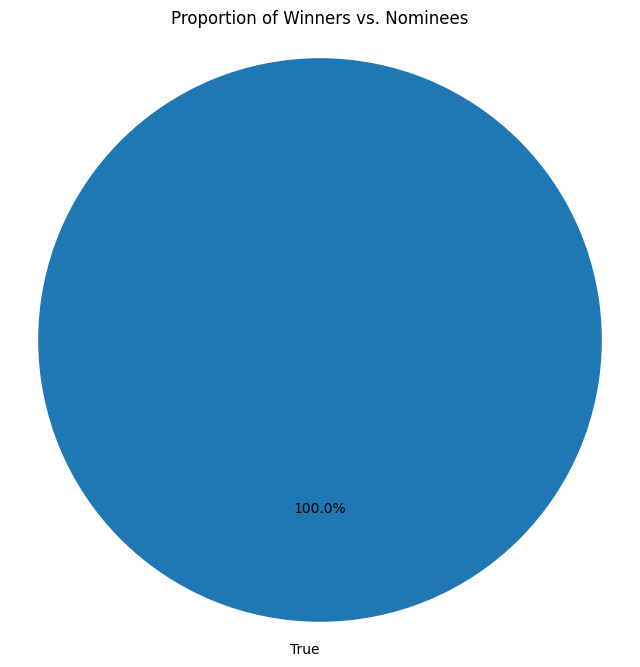

In [34]:
# Proportion of Winners vs. Nominees 
winner_counts = df_grammys['winner'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Winners vs. Nominees')
plt.axis('equal')
plt.show()

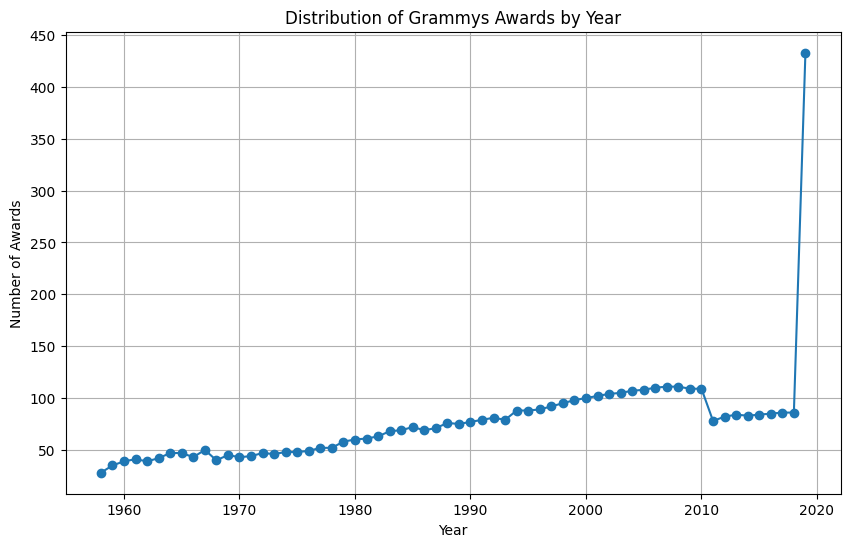

In [32]:
# Distribution of Awards by Year 

awards_by_year = df_grammys['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(awards_by_year.index, awards_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Awards')
plt.title('Distribution of Grammys Awards by Year')
plt.grid(True)
plt.show()


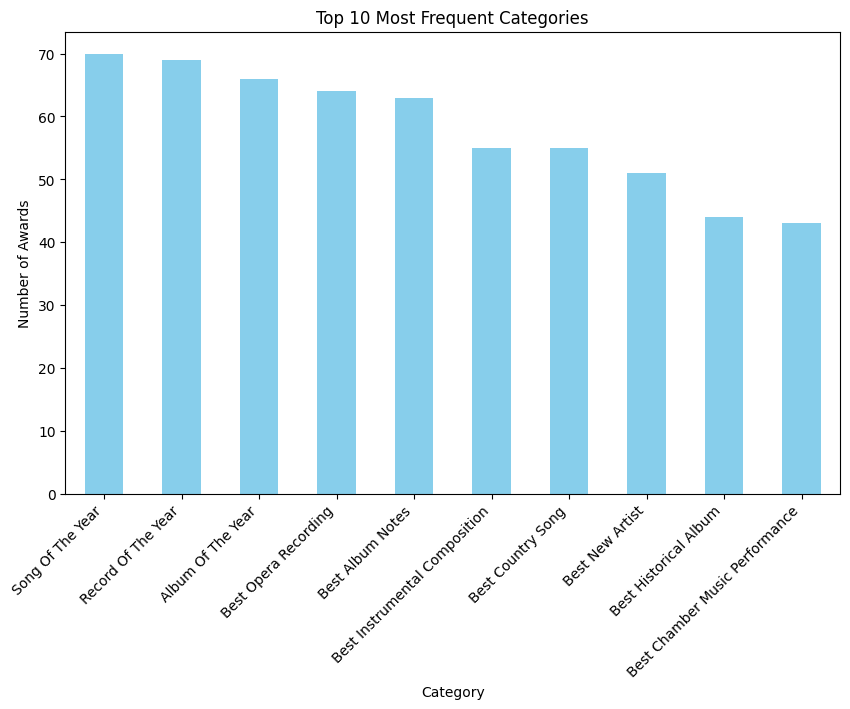

In [33]:
# Most Frequent Categories

top_categories = df_grammys['category'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Awards')
plt.title('Top 10 Most Frequent Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

